<h2 style="font-family:Comic Sans MS; color:#2bb5bd">Smoking Cancer Stage</h2>

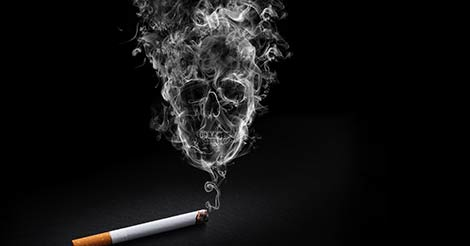

<div style="text-align: left;">
    <table>
        <tr>
            <th><b>Attribute</b></th>
            <th><b>Details</b></th>
        </tr>
        <tr>
            <td><b>Author</b></td>
            <td><b>Muhammad Tayyab Ali</b></td>
        </tr>
        <tr>
            <td>GitHub</td>
            <td><a href="https://github.com/TayyabAli92"><img src="https://img.shields.io/badge/GitHub-Profile-red?style=for-the-badge&logo=github" alt="GitHub"/></a></td>
        </tr>
        <tr>
            <td>LinkedIn</td>
            <td><a href="https://www.linkedin.com/in/tayyab-ali-personal-86a3582b8/"><img src="https://img.shields.io/badge/LinkedIn-Profile-red?style=for-the-badge&logo=linkedin" alt="LinkedIn"/></a></td>
        </tr>
        <tr>
            <td>Twitter</td>
            <td><a href="https://twitter.com/Tayyab_Ali92"><img src="https://img.shields.io/badge/Twitter-Profile-red?style=for-the-badge&logo=twitter" alt="Twitter"/></a></td>
        </tr>
        <tr>
            <td>Facebook</td>
            <td><a href="https://www.facebook.com/profile.php?id=61556758989955"><img src="https://img.shields.io/badge/Facebook-Profile-red?style=for-the-badge&logo=facebook" alt="Facebook"/></a></td>
        </tr>
        <tr>
            <td>Gmail</td>
            <td><a href="tayyabali.personal@gmail.com"><img src="https://img.shields.io/badge/Gmail-Contact%20Me-green?style=for-the-badge&logo=gmail" alt="Gmail"/></a></td>
        </tr>
    </table>
</div>

<h2 style="font-family:Comic Sans MS; color:#2bb5bd">Import libraries</h2>

In [32]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h2 style="font-family:Comic Sans MS; color:#2bb5bd">Load the dataset</h2>

In [33]:
# load the data
df = pd.read_csv('./Data/lung_cancer.csv')

In [34]:
df.head()

,pid,age,gender,race,smoker,days_to_cancer,stage_of_cancer
0,100001,70,Male,White,Current,NaN,NaN
1,100002,66,Male,White,Current,NaN,NaN
2,100003,64,Male,White,Current,NaN,NaN
3,100004,60,Male,White,Former,NaN,NaN
4,100005,64,Male,White,Former,NaN,NaN


<h2 style="font-family:Comic Sans MS; color:#2bb5bd">Data Preprocessing</h2>

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53427 entries, 0 to 53426
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              53427 non-null  int64  
 1   age              53427 non-null  int64  
 2   gender           53427 non-null  object 
 3   race             53166 non-null  object 
 4   smoker           53427 non-null  object 
 5   days_to_cancer   2033 non-null   float64
 6   stage_of_cancer  2032 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 2.9+ MB


In [36]:
df['stage_of_cancer'].unique()

array([nan, 'IA', 'IIB', 'IV', 'IIIB', 'IIIA', 'IIA', 'IB'], dtype=object)

In [37]:
df['stage_of_cancer'] = df['stage_of_cancer'].replace({'IA': 1, 'IB' : 1,'IIA':1,
                                                       'IIB':1,'IIIA':2,'IIIB':2,'IV':2})

In [38]:
df=df.fillna({'stage_of_cancer': 0, 'days_to_cancer': 0, 'race': 'Others'})

In [39]:
df[['stage_of_cancer', 'days_to_cancer']] = df[['stage_of_cancer', 'days_to_cancer']].astype('int')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53427 entries, 0 to 53426
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   pid              53427 non-null  int64 
 1   age              53427 non-null  int64 
 2   gender           53427 non-null  object
 3   race             53427 non-null  object
 4   smoker           53427 non-null  object
 5   days_to_cancer   53427 non-null  int32 
 6   stage_of_cancer  53427 non-null  int32 
dtypes: int32(2), int64(2), object(3)
memory usage: 2.4+ MB


<h2 style="font-family:Comic Sans MS; color:#2bb5bd">Ploting the Data</h2>

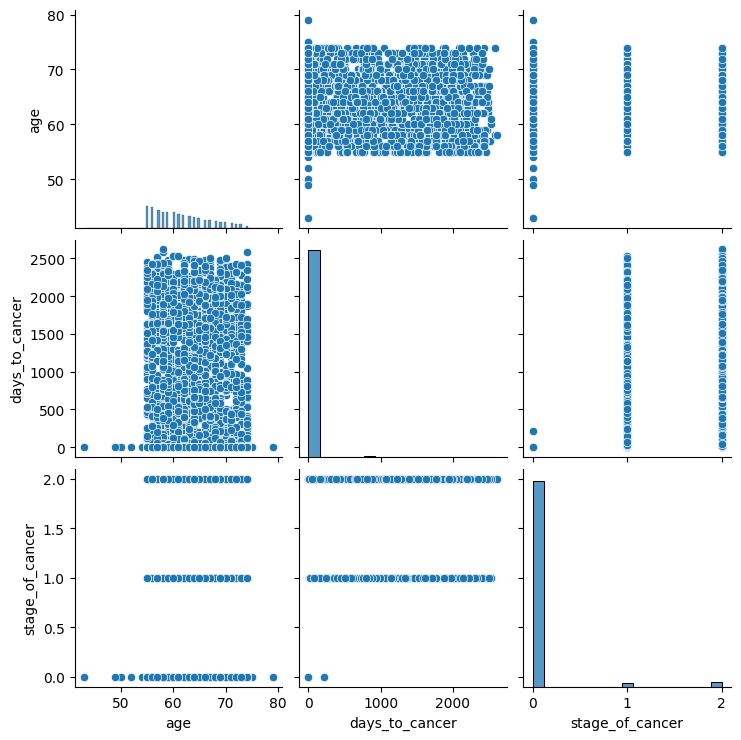

In [41]:
sns.pairplot(df.drop(columns=['pid']))

In [42]:
df.groupby('stage_of_cancer')['stage_of_cancer'].count()

stage_of_cancer
0    51395
1      977
2     1055
Name: stage_of_cancer, dtype: int64

<Axes: ylabel='stage_of_cancer'>

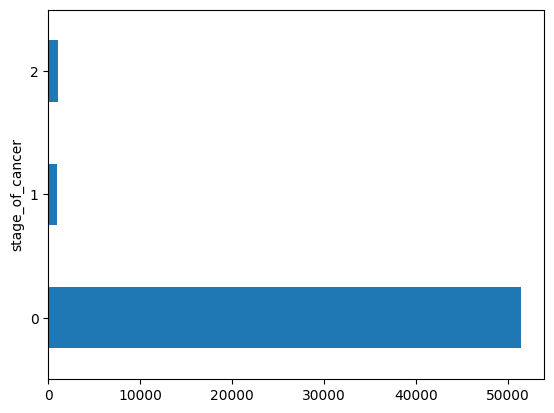

In [43]:
df.groupby('stage_of_cancer')['stage_of_cancer'].count().plot.barh()

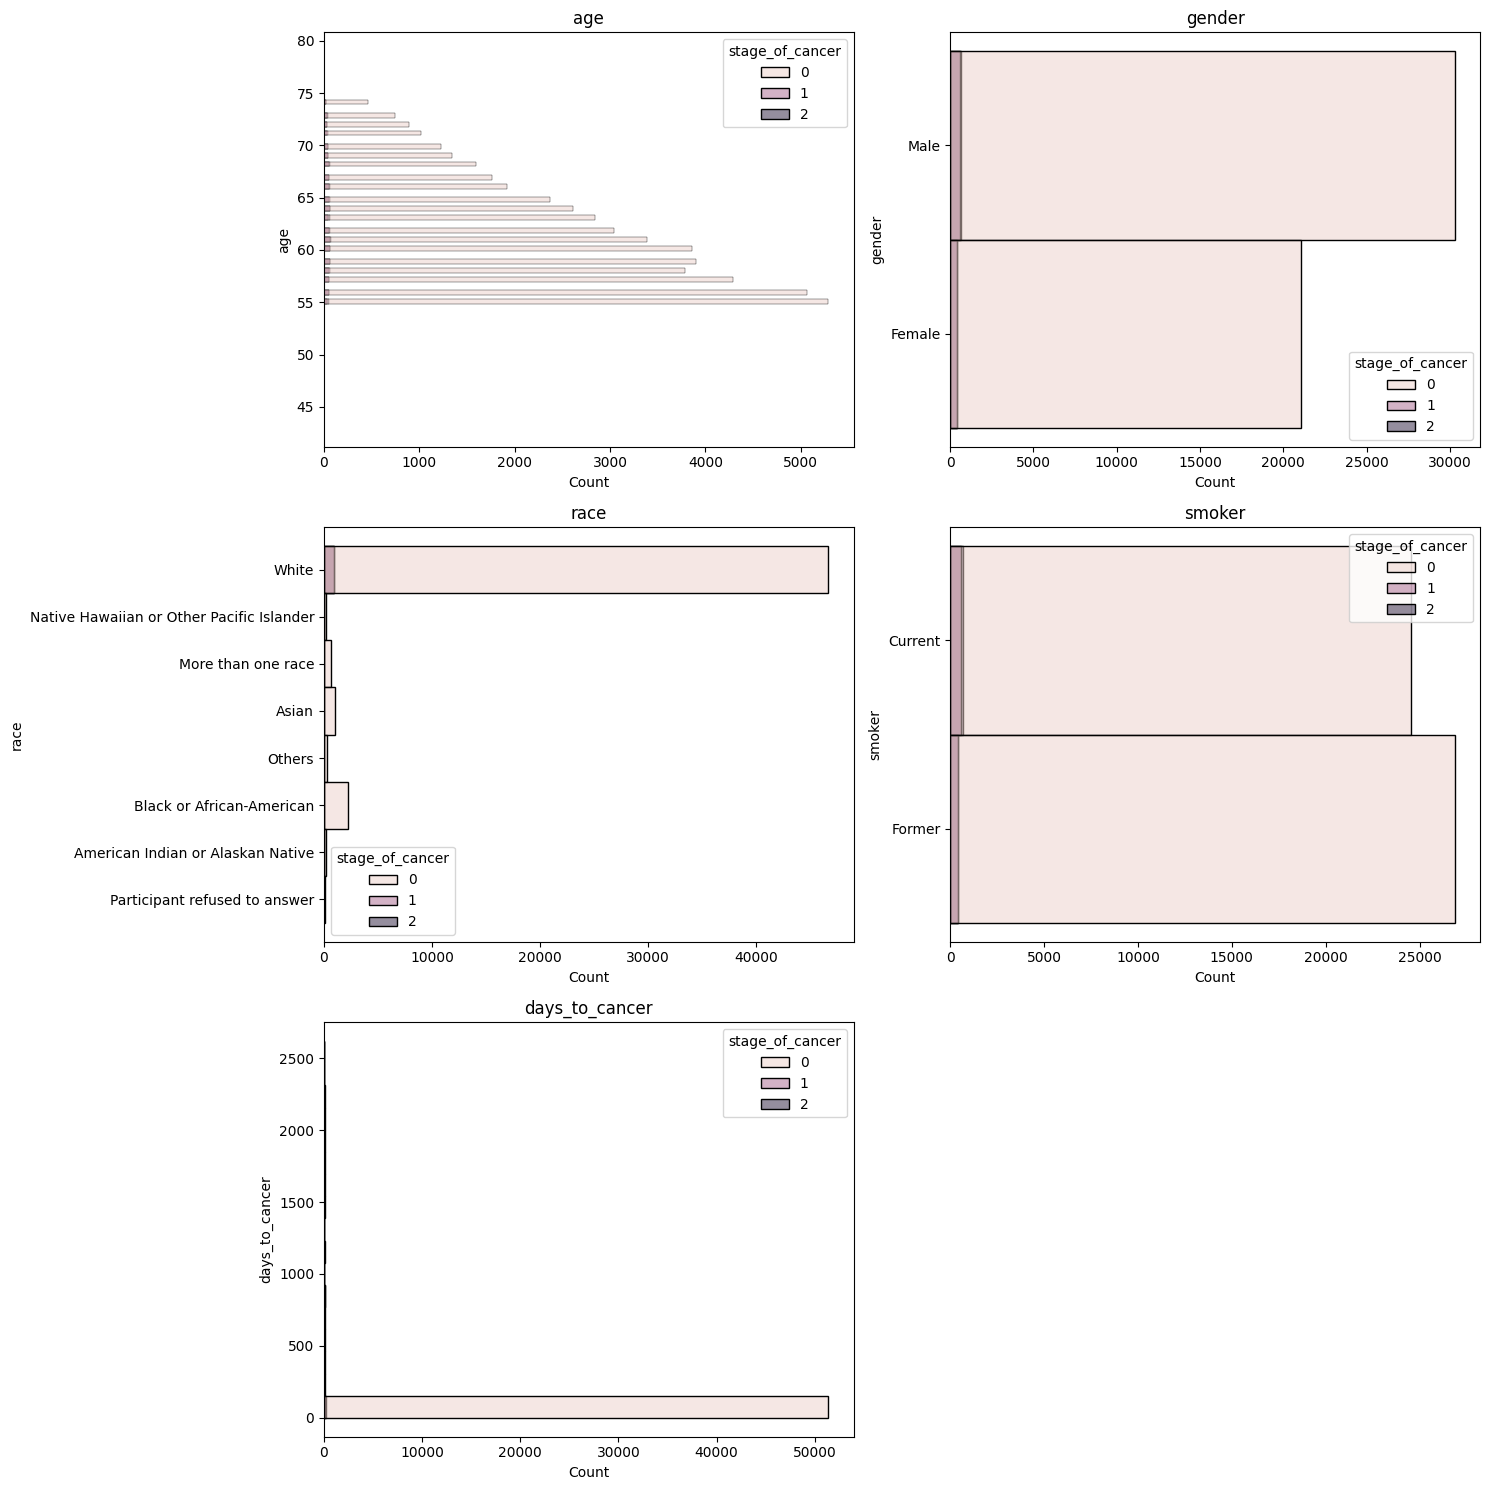

In [44]:
col=['age', 'gender', 'race', 'smoker', 'days_to_cancer']
fig = plt.figure(figsize=(15,15))

for i in range(len(col)):
    plt.subplot(3,2,i+1)
    plt.title(col[i])
    sns.histplot(data=df,y=df[col[i]],hue='stage_of_cancer')

plt.tight_layout()
plt.show()

In [45]:
df1=df[df['stage_of_cancer']>0]

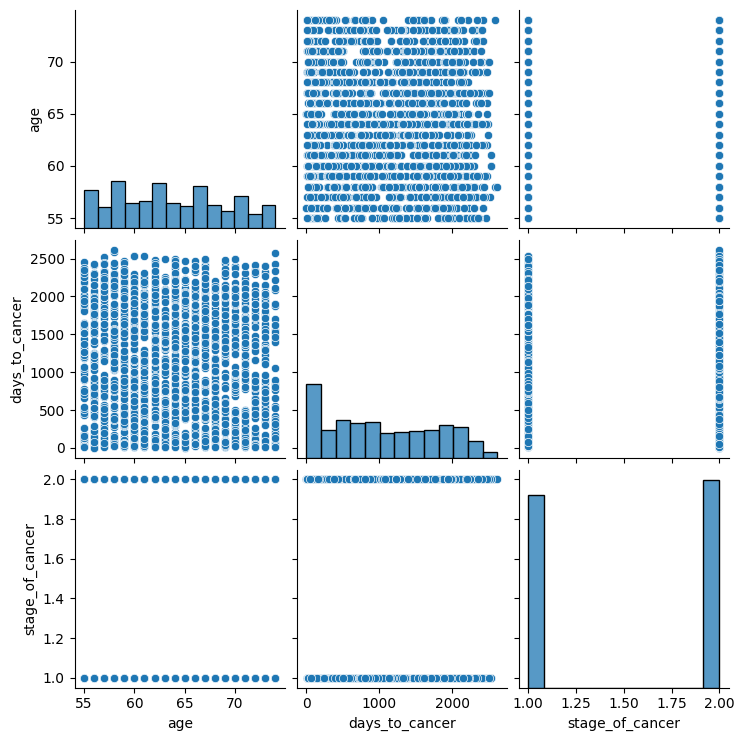

In [46]:
sns.pairplot(df1.drop(columns=['pid']))

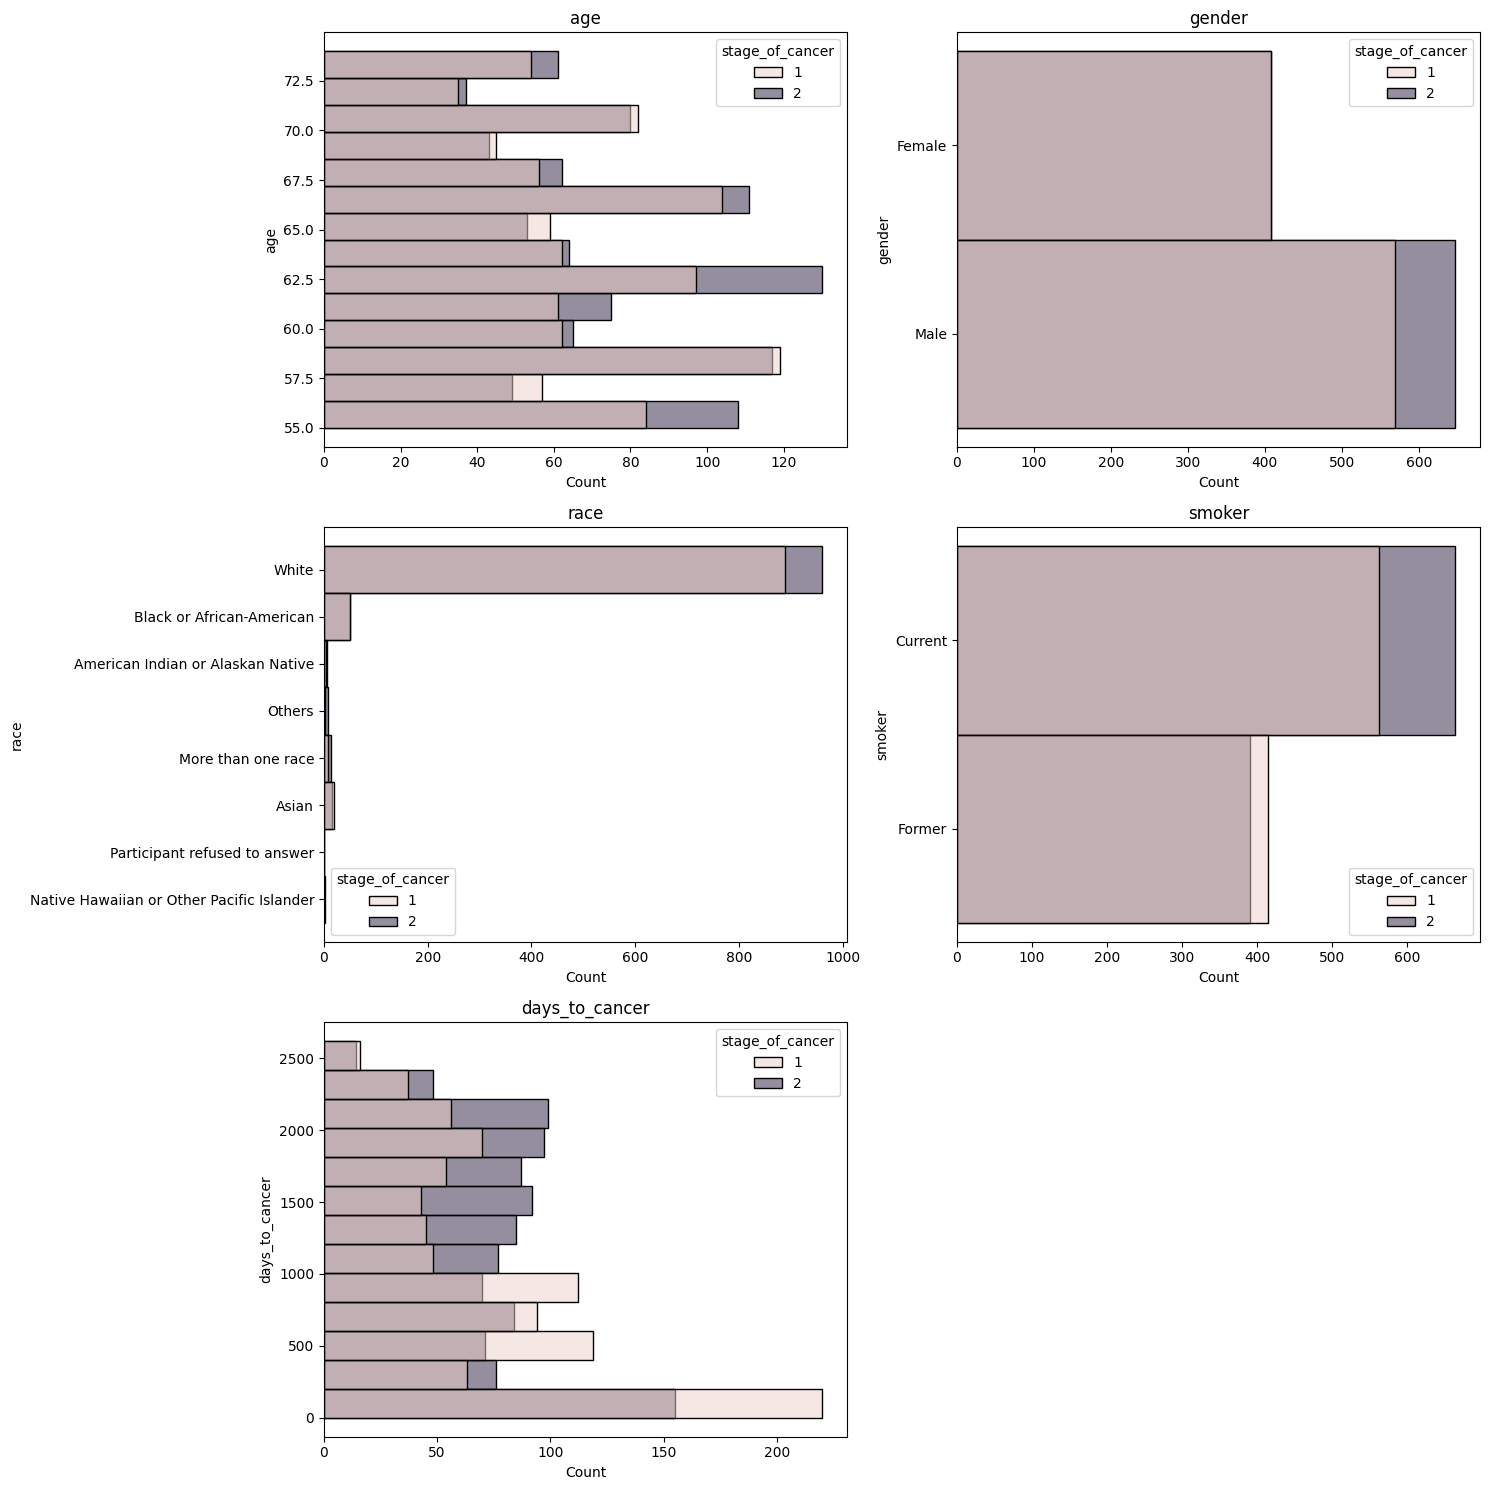

In [47]:
col=['age', 'gender', 'race', 'smoker', 'days_to_cancer']
fig = plt.figure(figsize=(15,15))

for i in range(len(col)):
    plt.subplot(3,2,i+1)
    plt.title(col[i])
    sns.histplot(data=df1,y=df1[col[i]],hue='stage_of_cancer')

plt.tight_layout()
plt.show()

In [48]:
df2=pd.get_dummies(df1)
df2=df2.reset_index(drop=True)
df2.head()

,pid,age,days_to_cancer,stage_of_cancer,gender_Female,gender_Male,race_American Indian or Alaskan Native,race_Asian,race_Black or African-American,race_More than one race,race_Native Hawaiian or Other Pacific Islander,race_Others,race_Participant refused to answer,race_White,smoker_Current,smoker_Former
0,100012,61,454,1,True,False,False,False,False,False,False,False,False,True,True,False
1,100049,74,2428,1,True,False,False,False,False,False,False,False,False,True,True,False
2,100055,67,148,2,False,True,False,False,False,False,False,False,False,True,False,True
3,100147,68,491,1,False,True,False,False,False,False,False,False,False,True,False,True
4,100158,65,795,1,False,True,False,False,False,False,False,False,False,True,False,True


In [49]:
X= df2.drop(['pid','stage_of_cancer'],axis=1)
y= df2['stage_of_cancer']

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=0,test_size=0.2)

<h2 style="font-family:Comic Sans MS; color:#2bb5bd">Standardization</h2>

In [51]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_sc= scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test) 

<h2 style="font-family:Comic Sans MS; color:#2bb5bd">Logistic Regression</h2>

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

clf= LogisticRegression(max_iter=1000)
clf.fit(X_train_sc,y_train)
y_pred =clf.predict(X_test_sc)

print('Training Accuracy: ', clf.score(X_train_sc, y_train))
print('Testing Accuracy: ', clf.score(X_test_sc, y_test))
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))

Training Accuracy:  0.576
Testing Accuracy:  0.5896805896805897
Confusion Matrix: 
 [[106  79]
 [ 88 134]]


<h2 style="font-family:Comic Sans MS; color:#2bb5bd">K-Nearest Neighbors (KNN)</h2>

In [53]:
from sklearn.neighbors import KNeighborsClassifier
clf= KNeighborsClassifier()
clf.fit(X_train_sc,y_train)
y_pred =clf.predict(X_test_sc)

print('Training Accuracy: ', clf.score(X_train_sc, y_train))
print('Testing Accuracy: ', clf.score(X_test_sc, y_test))
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))

Training Accuracy:  0.7273846153846154
Testing Accuracy:  0.5577395577395577
Confusion Matrix: 
 [[ 91  94]
 [ 86 136]]


<h2 style="font-family:Comic Sans MS; color:#2bb5bd">Random Forest</h2>

In [54]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train_sc,y_train)
y_pred =clf.predict(X_test_sc)

print('Training Accuracy: ', clf.score(X_train_sc, y_train))
print('Testing Accuracy: ', clf.score(X_test_sc, y_test))
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))

Training Accuracy:  0.9981538461538462
Testing Accuracy:  0.5331695331695332
Confusion Matrix: 
 [[ 95  90]
 [100 122]]
